# Heart Disease Prediction

## Problem Statement

Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medical, as it is one of the leading disease related to unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or averion. In this study, we experiment with the heart disease dataset to explore the machine learning algorithms and build an optimum model to predict the disease.                    

## Data Definition

Each attribute is a medical risk factor.

    
**age**: Age of the patient - (Numerical)

**gender**: Gender of the patient - (0,1) - (Male, Female) - (Categorical) 
 
**chest_pain**: It refers to the chest pain experienced by the patient -(0,1,2,3) - (Categorical)
    
**rest_bps**: Blood pressure of the patient while resting(in mm/Hg) - (Numerical)
    
**cholestrol**: Patient's cholestrol level (in mg/dl) - (Numerical)
    
**fasting_blood_sugar**: Blood sugar of the patient while fasting - (>120mg/: = 1, otherwise = 0) - (Categorical)
    
**rest_ecg**: Potassium level (0,1,2) - (Categorical)
    
**thalach**: The patients maximum heart rate - (Numerical)
    
**exer_angina**: It refers to the exercise induced angina - (1=Yes, 0=No) - (Categorical)
    
**old_peak**: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)  (Numerical)
    
**slope**:  It refers to the slope of the peak of the exercise ST Segment- (0,1,2) - (Categorical)
    
**ca**: Number of major vessels - (0,1,2,3,4) - (Categorical)
    
**thalassemia**: It refers to thalassemia which is a blood disorder - (0,1,2,3) - (Categorical)
 
**target**: Patient has heart disease or not - (1=Yes, 0=No) - (Target variable)

## Descriptive Analysis and Data Preparation

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, roc_curve, roc_auc_score 
import statsmodels.api as sm
from sklearn import metrics
import graphviz
from IPython.display import Image
import pydotplus
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
pd.options.display.max_columns = None

In [12]:
df = pd.read_csv("Project 4 - Decision Trees/Dataset/HeartDisease.csv")
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


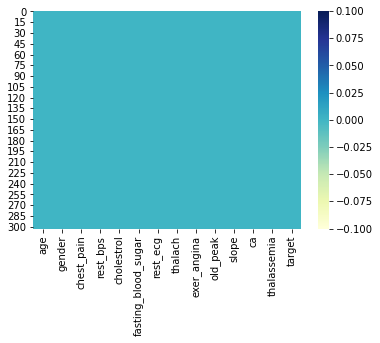

In [17]:
sns.heatmap(df.isnull(), cmap = "YlGnBu")
plt.show()

In [18]:
cat_cols = ["gender","chest_pain","fasting_blood_sugar",
            "rest_ecg","exer_angina","slope","ca","thalassemia"]
for i in cat_cols:
    df[i] = df[i].astype("object")

In [19]:
df.describe()

,age,rest_bps,cholestrol,thalach,old_peak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [20]:
df.describe(include = "object")

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


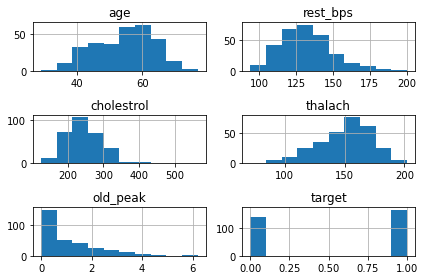

In [22]:
df.hist()
plt.tight_layout()
plt.show()

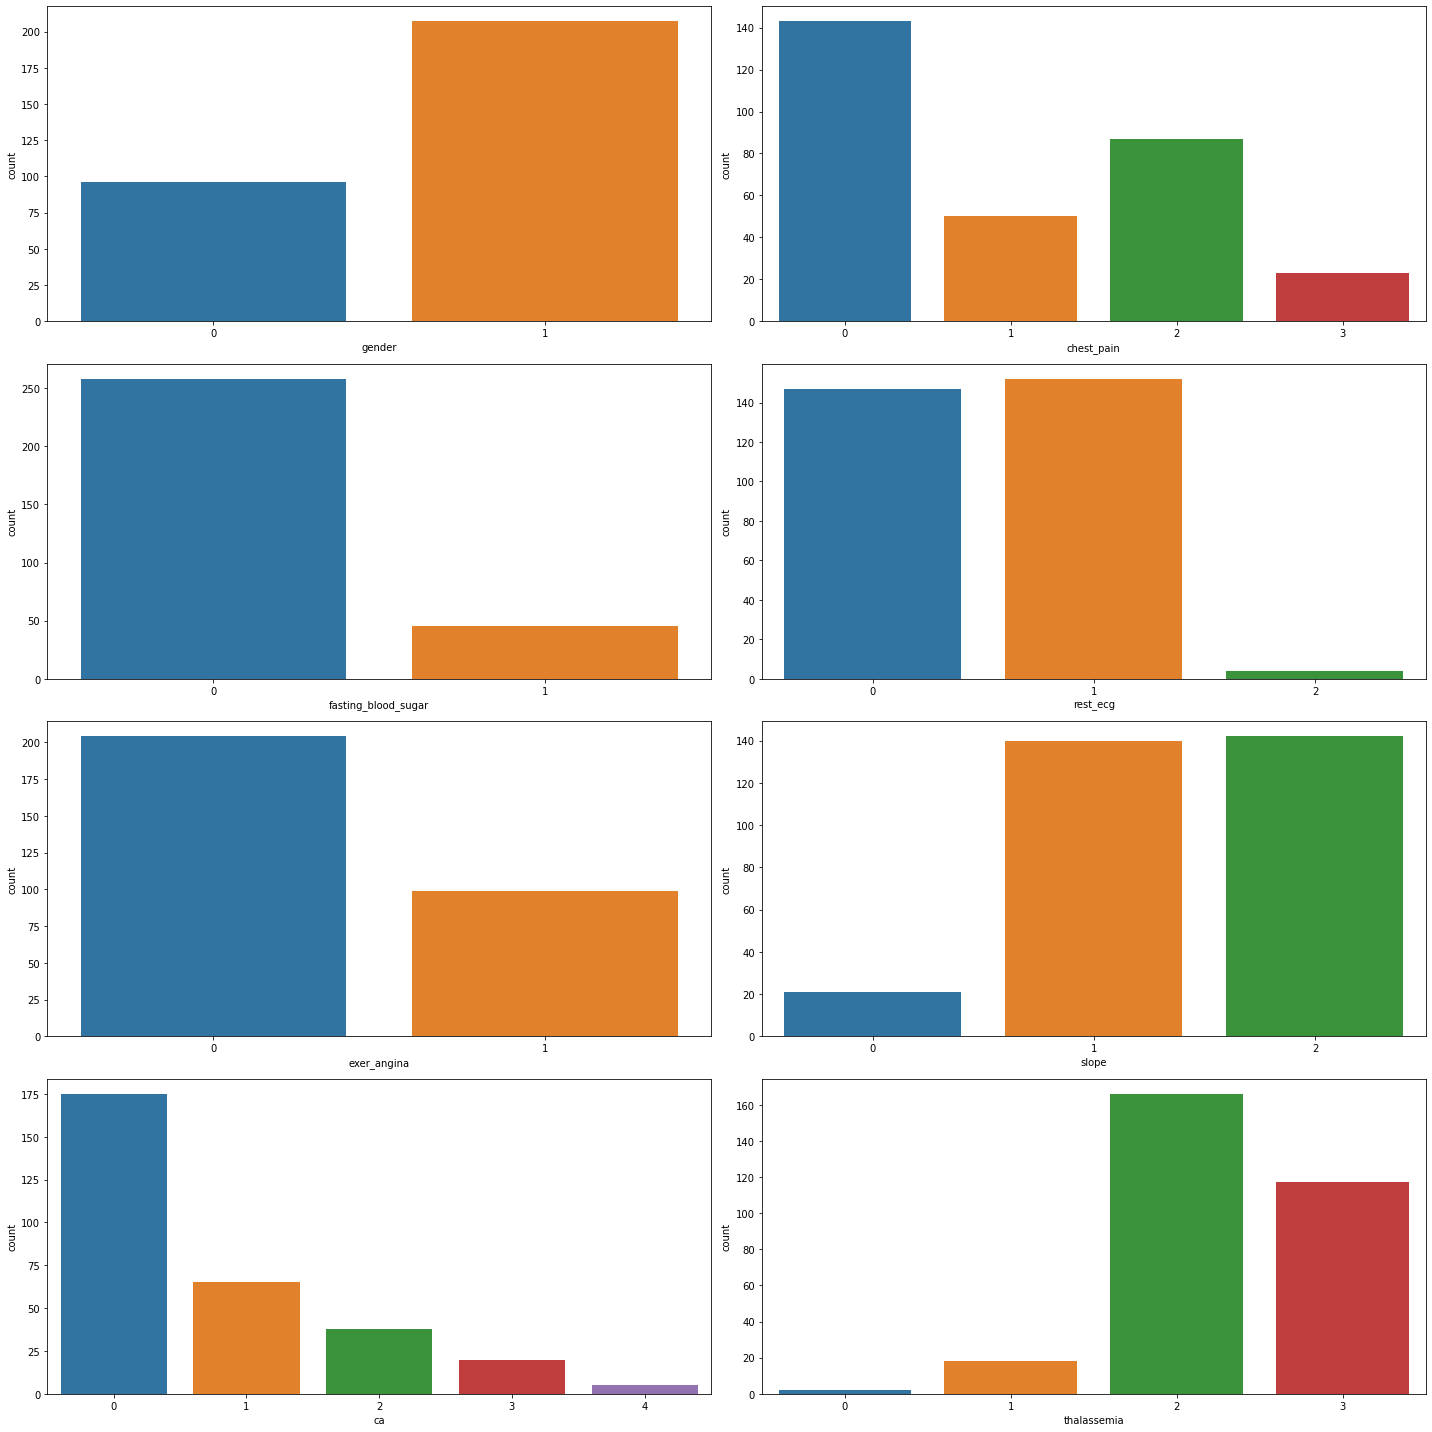

In [27]:
fig, ax = plt.subplots(nrows = 4 , ncols = 2, figsize = (20,20))
for i,j in zip(df.select_dtypes("object").columns, ax.flatten()):
    sns.countplot(df.select_dtypes("object")[i], ax =j)
plt.tight_layout()
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    object 
 2   chest_pain           303 non-null    object 
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    object 
 6   rest_ecg             303 non-null    object 
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    object 
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    object 
 11  ca                   303 non-null    object 
 12  thalassemia          303 non-null    object 
 13  target               303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [31]:
final_df = pd.get_dummies(df, drop_first = True)
final_df

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1


## Building the Model

In [69]:
def model_efficiency(y_test, y_pred):
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test,y_pred))
    print("Classification Report:\n", classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm, index = ["Actual:0","Actual:1"], columns = ["Predicted:0","Predicted:1"])
    sns.heatmap(confusion, fmt ="d", annot= True)
    plt.show()

In [58]:
def plot_roc(y_test,y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],"r--")
    plt.text(x = 0.02, y = 0.9, s =( "ROC AUC SCore:", roc_auc_score(y_test, y_prob).round(4)))
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.show()

In [59]:
X = final_df.drop("target", axis = 1)
Y = final_df.target
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [60]:
mle_model = sm.Logit(y_train, x_train).fit()
y_pred_prob_mle = mle_model.predict(x_test)
y_pred_prob_mle

Optimization terminated successfully.
         Current function value: 0.274910
         Iterations 8


246    0.008634
183    0.209634
229    0.274415
126    0.915241
184    0.053035
         ...   
69     0.993884
21     0.969929
210    0.129498
78     0.993763
174    0.003613
Length: 91, dtype: float64

In [61]:
y_pred_mle = [0 if x <0.5 else 1 for x in y_pred_prob_mle]

Cohen Kappa Score:  0.6494944631680308
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        50
           1       0.77      0.88      0.82        41

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



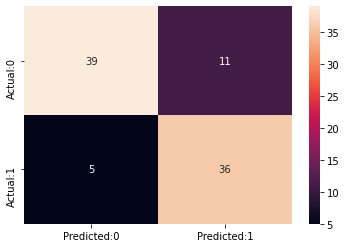

In [70]:
model_efficiency(y_test,y_pred_mle)

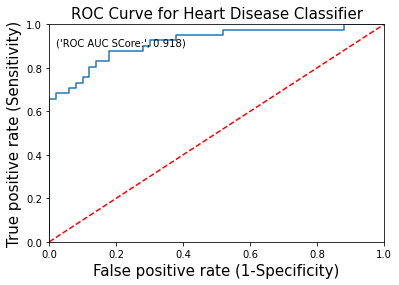

In [71]:
plot_roc(y_test,y_pred_prob_mle)

Cohen Kappa Score:  0.6878980891719745
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        50
           1       0.85      0.80      0.83        41

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



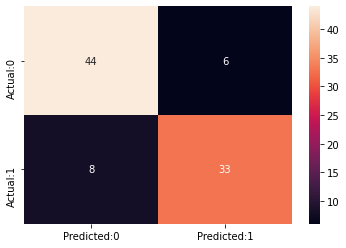

In [80]:
y_pred_mle_new = [0 if x<0.72 else 1 for x in y_pred_prob_mle]
model_efficiency(y_test, y_pred_mle_new)

In [97]:
sgd = SGDClassifier(loss ="log", max_iter = 1000, alpha = 0.01)
sgd_model = sgd.fit(x_train,y_train)

Cohen Kappa Score:  0.3374340949033392
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        50
           1       0.71      0.49      0.58        41

    accuracy                           0.68        91
   macro avg       0.69      0.66      0.66        91
weighted avg       0.69      0.68      0.67        91



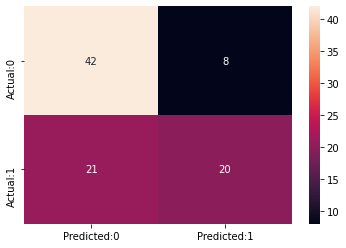

In [98]:
y_pred_prob_sgd = sgd.predict_proba(x_test)[:,1]
y_pred_sgd =sgd.predict(x_test)
model_efficiency(y_test,y_pred_sgd)

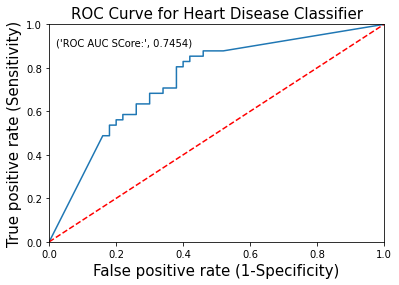

In [99]:
plot_roc(y_test,y_pred_prob_sgd)

In [102]:
dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 30, criterion = "entropy")
dt_model = dt.fit(x_train,y_train)

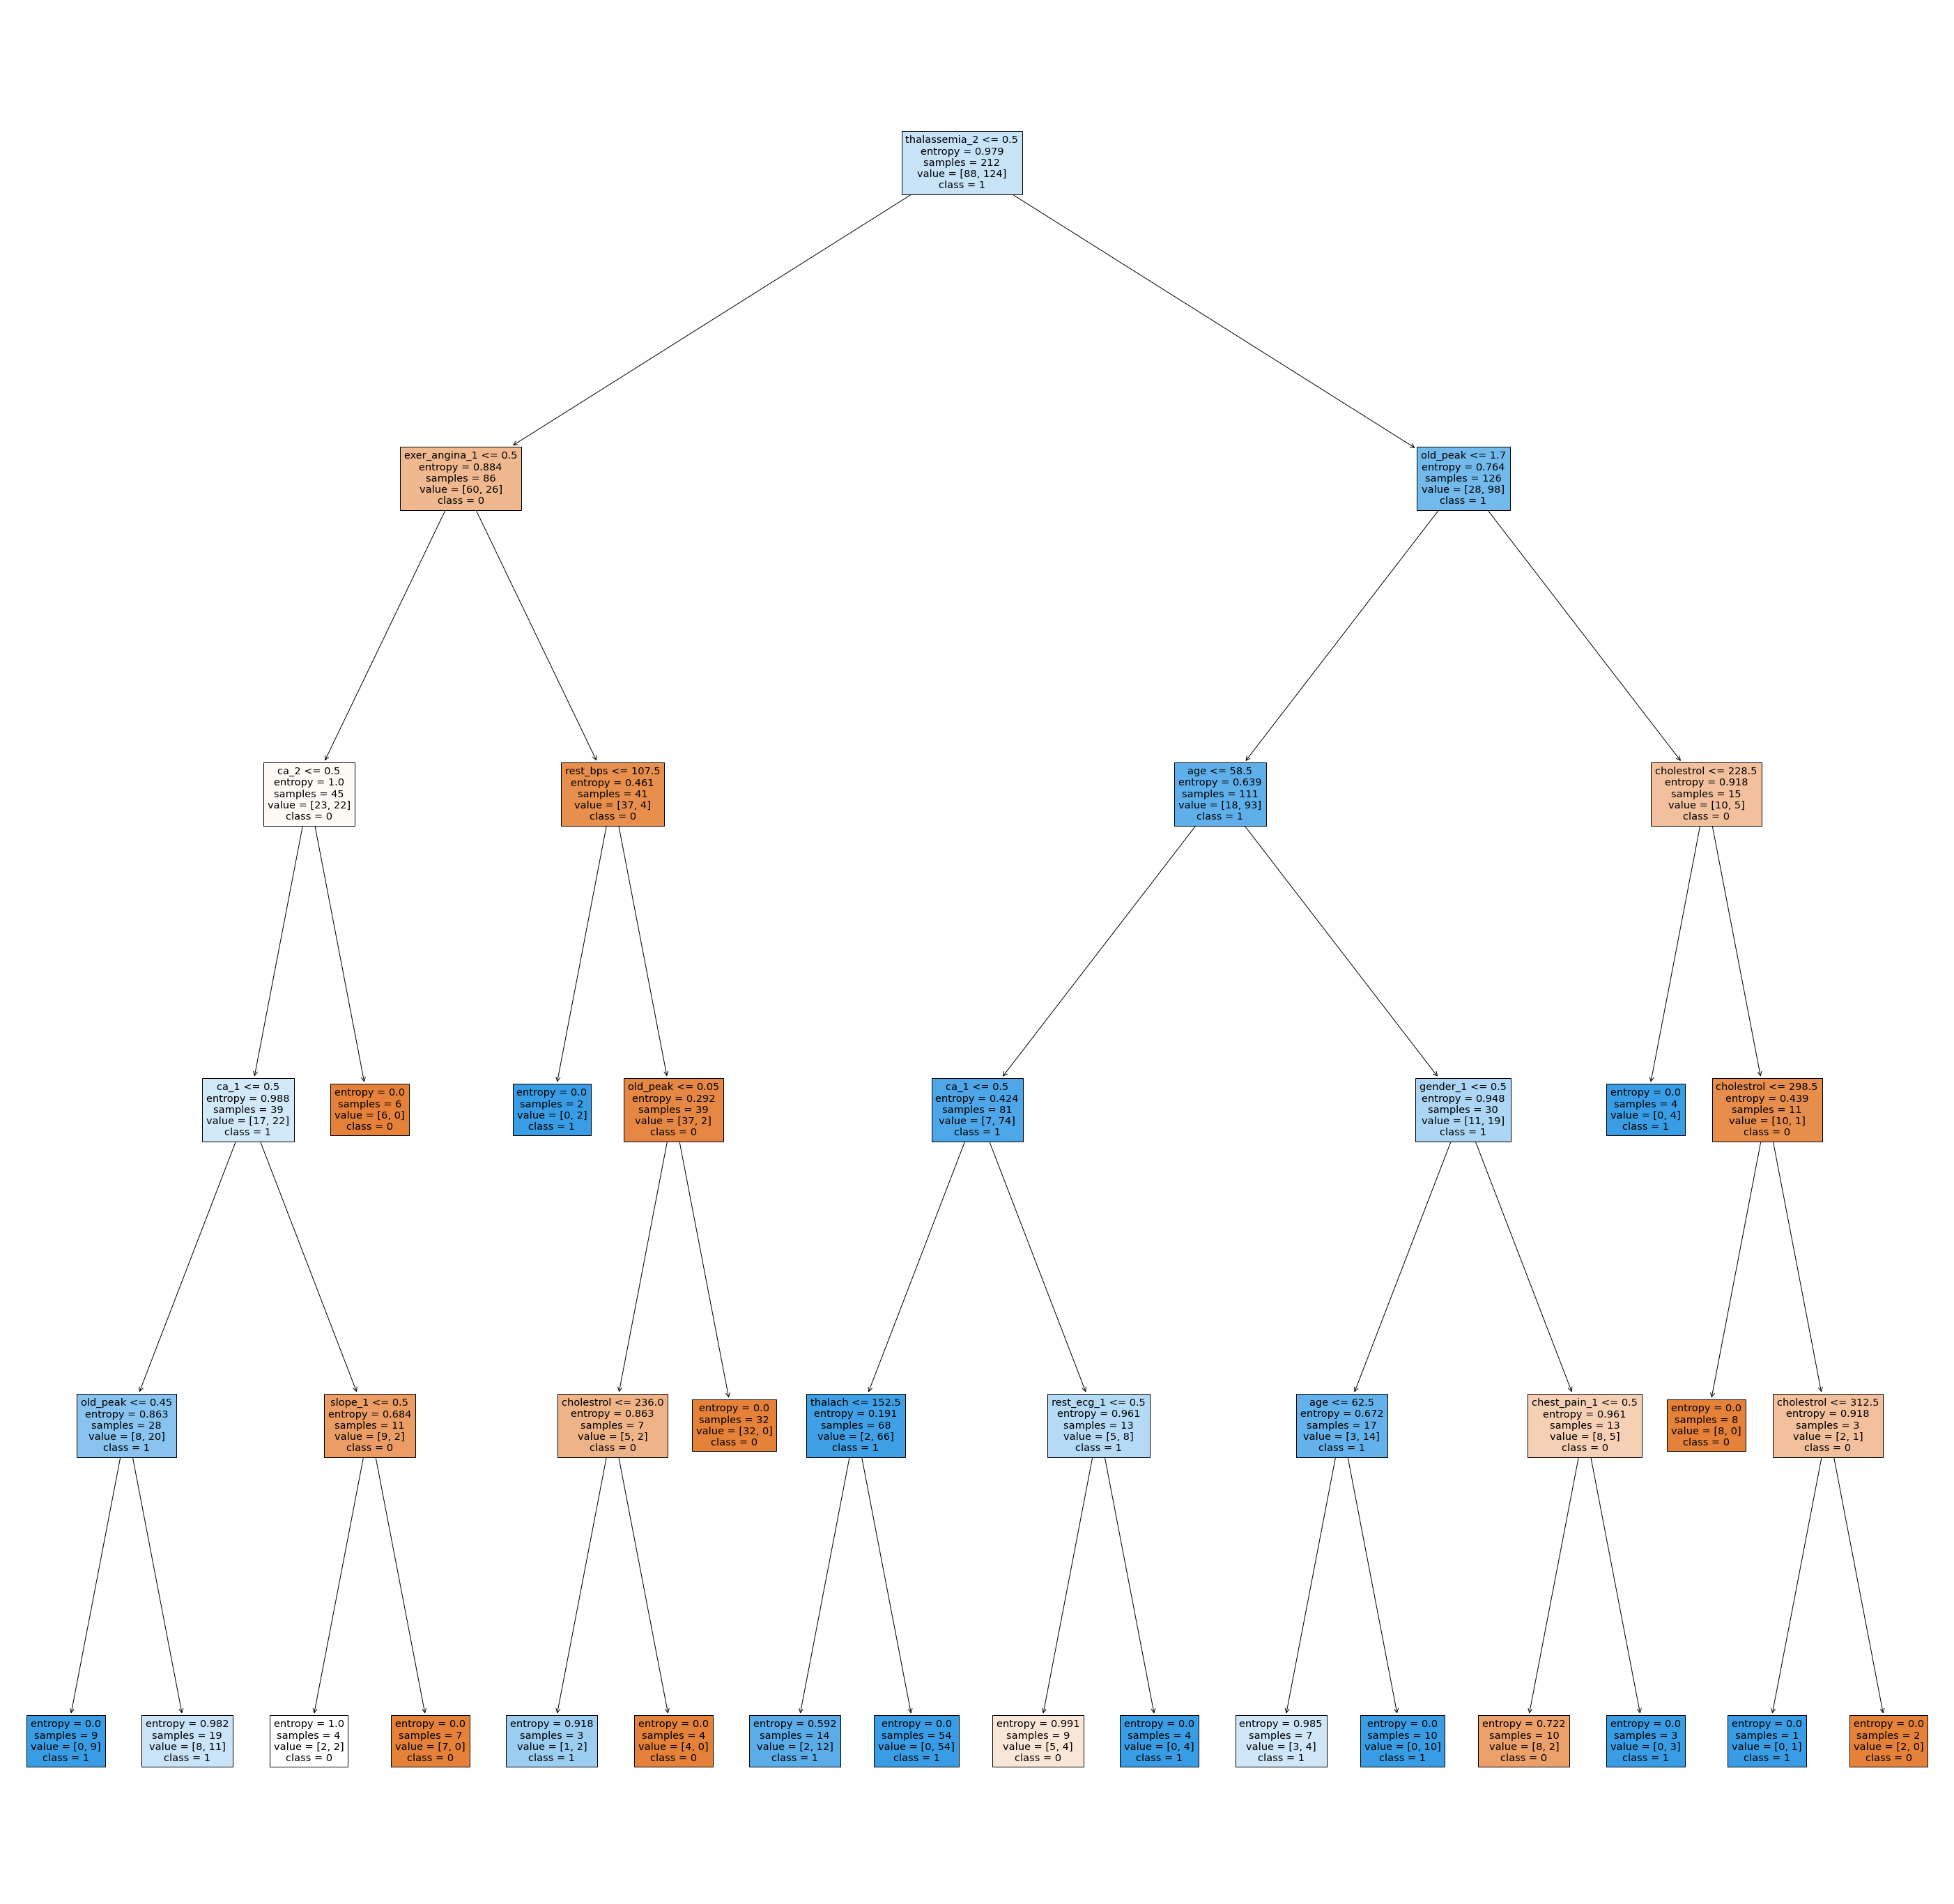

In [106]:
fig = plt.figure(figsize = (50,50))
_=tree.plot_tree(dt_model, feature_names = x_train.columns, class_names = ["0","1"],filled = True)

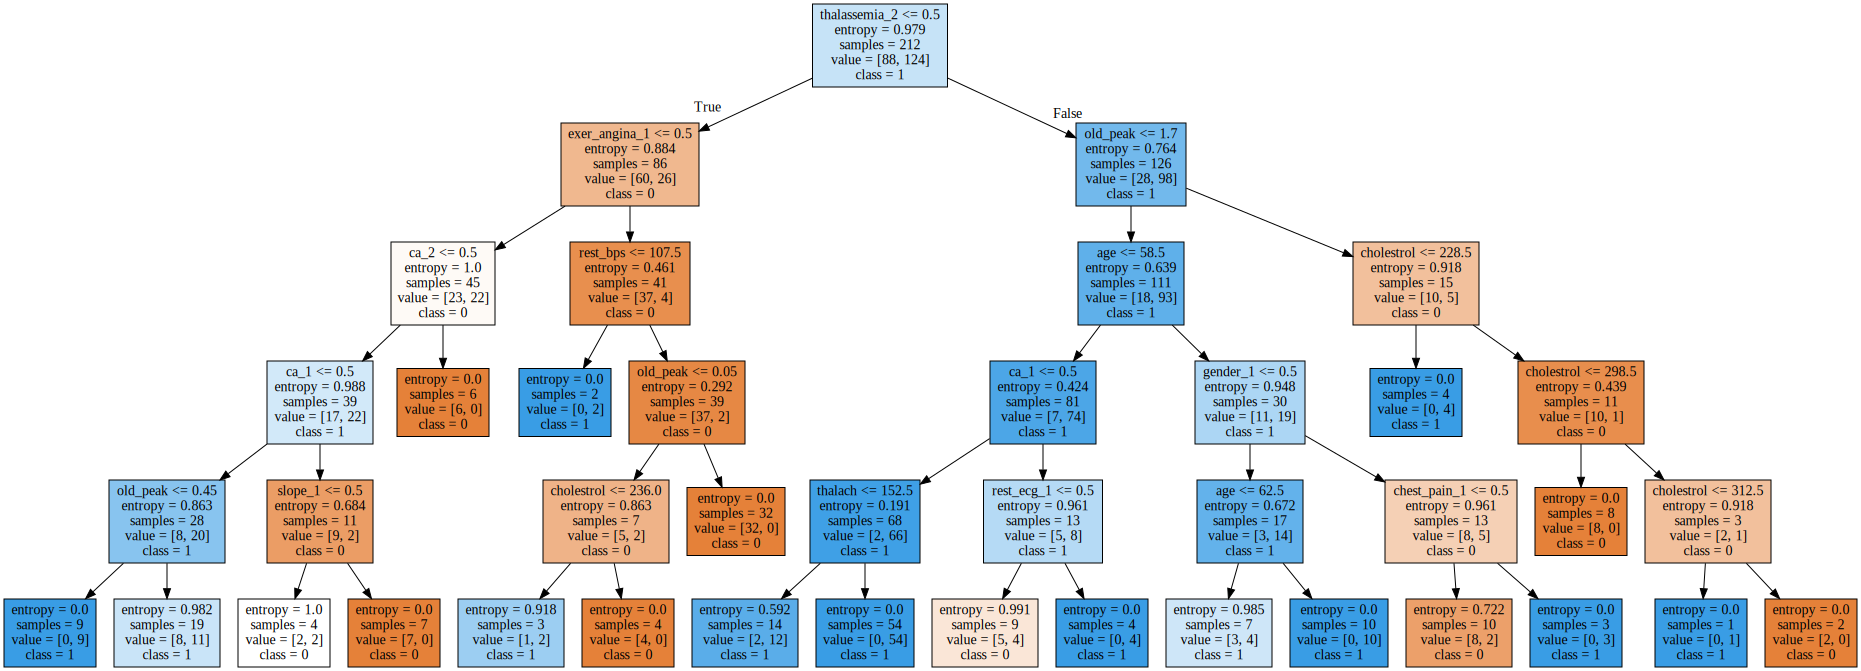

In [113]:
dot_data_dt = tree.export_graphviz(dt_model, out_file = None, feature_names = x_train.columns, class_names=["0","1"], filled = True)
graphviz.Source(dot_data_dt, format = "png")

Cohen Kappa Score:  0.42794970986460346
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.67      0.73      0.70        41

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



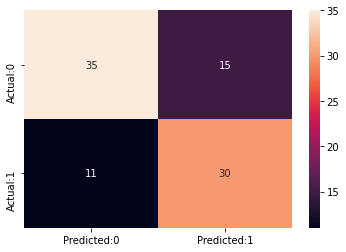

In [103]:
y_pred_prob_dt = dt_model.predict_proba(x_test)[:,1]
y_pred_dt = dt_model.predict(x_test)
model_efficiency(y_test, y_pred_dt)

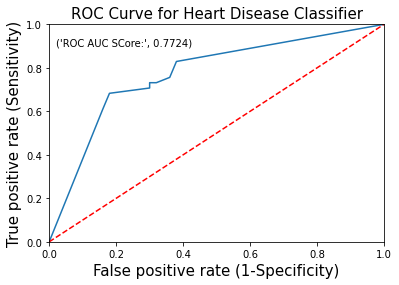

In [104]:
plot_roc(y_test, y_pred_prob_dt)

In [114]:
tuned_params = [{"criterion":["gini","entropy"],
                "max_depth":[3,5,7,9],
                "max_leaf_nodes":[10,15,20,25],
                "min_samples_leaf":[10,15,20]}]
dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator = dt, param_grid = tuned_params, cv =10)
dt_grid = grid.fit(x_train,y_train)
print("Best Parameters: ", dt_grid.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}


In [116]:
grid_dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 10, min_samples_leaf= 10)
grid_dt_model = grid_dt.fit(x_train,y_train)

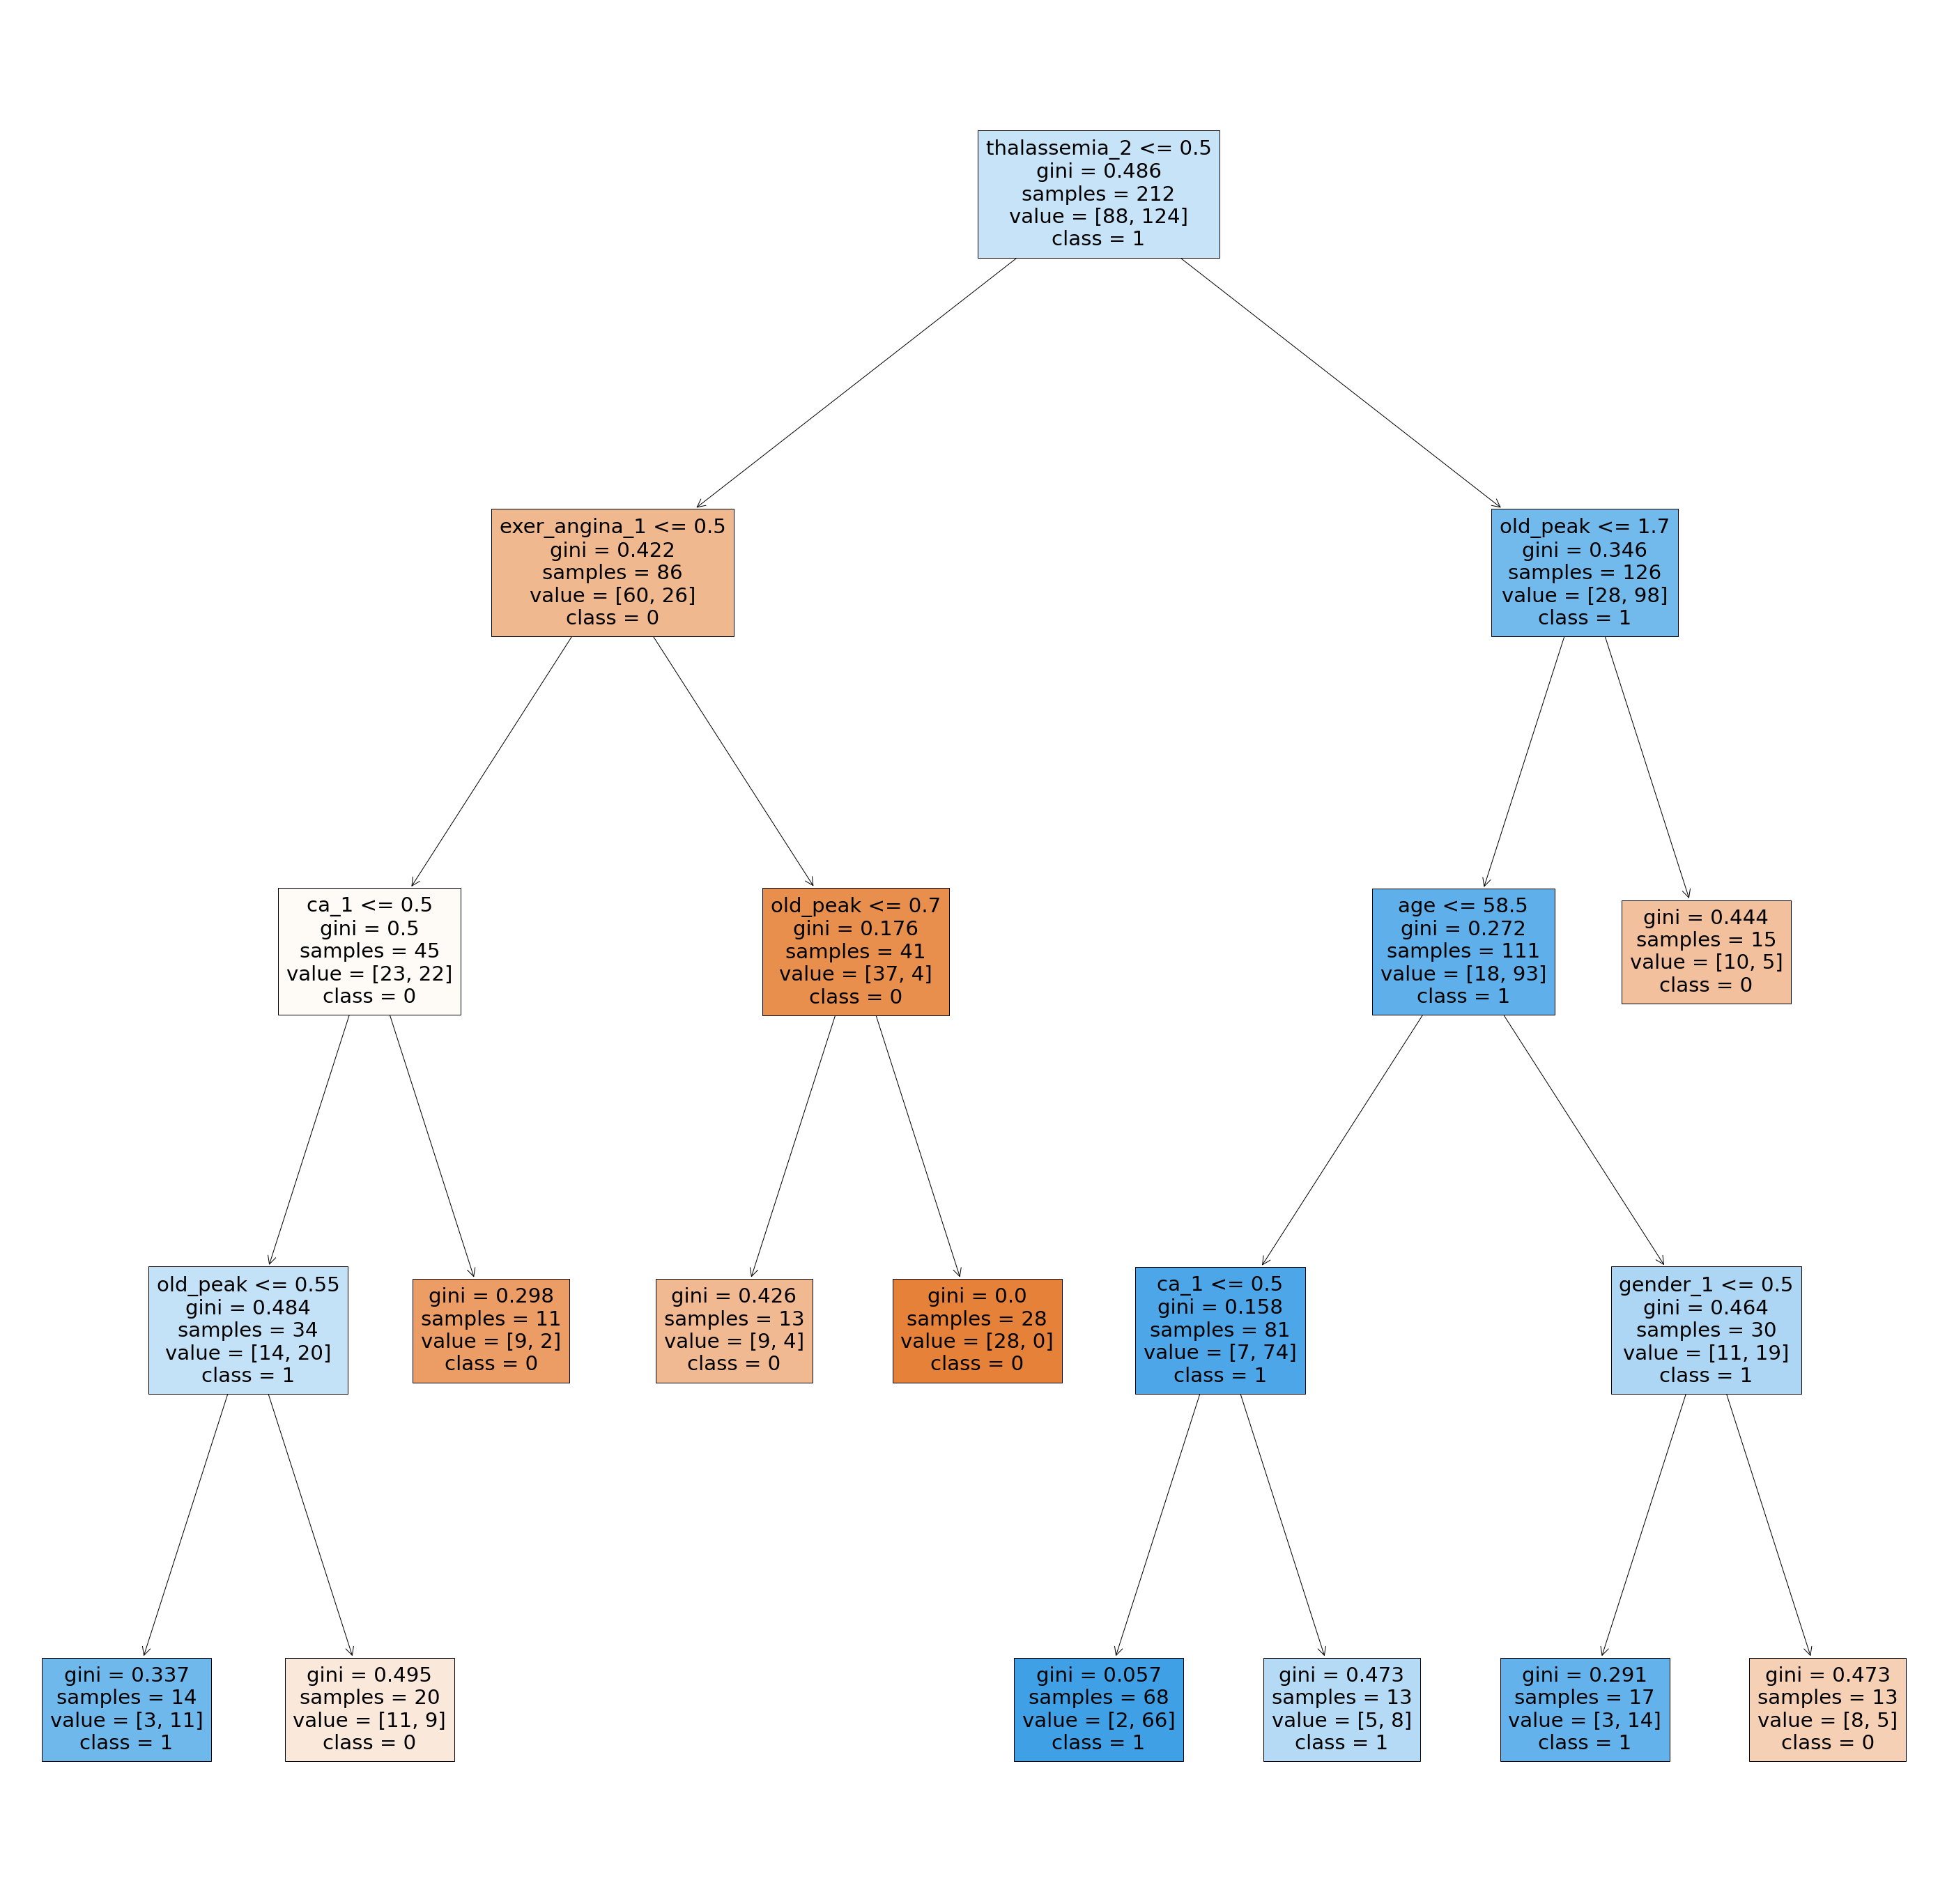

In [120]:
fig = plt.figure(figsize =(50,50))
_=tree.plot_tree(grid_dt_model, feature_names = x_train.columns, class_names =["0","1"], filled = True)

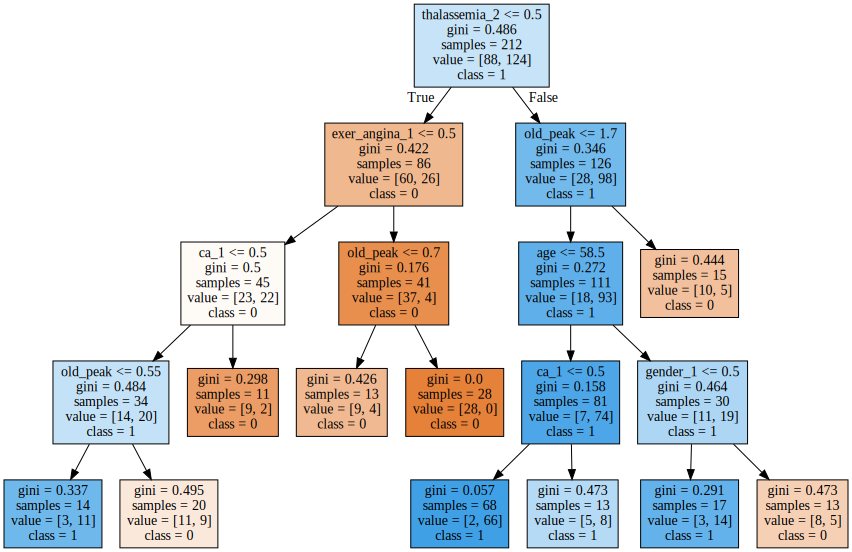

In [125]:
dot_data_grid = tree.export_graphviz(grid_dt_model, out_file=None, feature_names = x_train.columns, class_names = ["0","1"], filled =True)
graphviz.Source(dot_data_grid, format = "png")

Cohen Kappa Score:  0.554140127388535
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.77      0.73      0.75        41

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



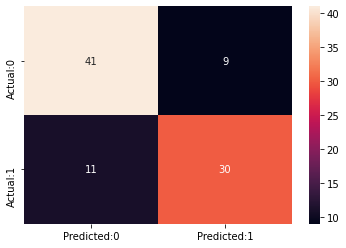

In [117]:
y_pred_prob_grid = grid_dt_model.predict_proba(x_test)[:,1]
y_pred_grid = grid_dt_model.predict(x_test)
model_efficiency(y_test,y_pred_grid)

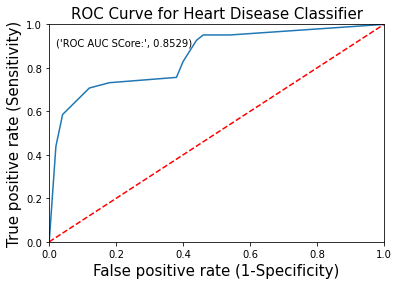

In [118]:
plot_roc(y_test,y_pred_prob_grid)

## Model Comparision

In [127]:
pd.DataFrame({"Model Name":["MLE Model (0.5 threshold)",
                            "MLE Model (0.72 threshold)",
                           "SGD Model","Decision Tree Model",
                           "Grid Search Model- DT"],
             "F-1 Score":[metrics.f1_score(y_test,y_pred_mle),
                          metrics.f1_score(y_test,y_pred_mle_new),
                         metrics.f1_score(y_test,y_pred_sgd),
                         metrics.f1_score(y_test,y_pred_dt),
                         metrics.f1_score(y_test,y_pred_grid)],
             "Accuracy":[metrics.accuracy_score(y_test,y_pred_mle),
                        metrics.accuracy_score(y_test,y_pred_mle_new),
                        metrics.accuracy_score(y_test,y_pred_sgd),
                        metrics.accuracy_score(y_test,y_pred_dt),
                        metrics.accuracy_score(y_test,y_pred_grid)],
             "Cohen Kappa Score":[metrics.cohen_kappa_score(y_test,y_pred_mle),
                                 metrics.cohen_kappa_score(y_test,y_pred_mle_new),
                                 metrics.cohen_kappa_score(y_test,y_pred_sgd),
                                 metrics.cohen_kappa_score(y_test,y_pred_dt),
                                 metrics.cohen_kappa_score(y_test,y_pred_grid)],
             "Recall":[metrics.recall_score(y_test,y_pred_mle),
                      metrics.recall_score(y_test,y_pred_mle_new),
                      metrics.recall_score(y_test,y_pred_sgd),
                      metrics.recall_score(y_test,y_pred_dt),
                      metrics.recall_score(y_test,y_pred_grid)],
             "Precision":[metrics.precision_score(y_test,y_pred_mle),
                      metrics.precision_score(y_test,y_pred_mle_new),
                      metrics.precision_score(y_test,y_pred_sgd),
                      metrics.precision_score(y_test,y_pred_dt),
                      metrics.precision_score(y_test,y_pred_grid)]})

,Model Name,F-1 Score,Accuracy,Cohen Kappa Score,Recall,Precision
0,MLE Model (0.5 threshold),0.818182,0.824176,0.649494,0.878049,0.765957
1,MLE Model (0.72 threshold),0.825000,0.846154,0.687898,0.804878,0.846154
2,SGD Model,0.579710,0.681319,0.337434,0.487805,0.714286
3,Decision Tree Model,0.697674,0.714286,0.427950,0.731707,0.666667
4,Grid Search Model- DT,0.750000,0.780220,0.554140,0.731707,0.769231
